<a href="https://colab.research.google.com/github/GTcods/MNIST-Handwritten-NN-and-CNN/blob/main/Mnist_NN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten NN and CNN for Mnist Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('sample_data/mnist_train_small.csv')

cols = [i for i in range(784)]

X_train = data.iloc[:, 1:]
X_train.columns = cols

y_train = data.iloc[:, :1]
y_train.columns = ['number']

X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

,number
0,5
1,7
2,9
3,5
4,2


In [ ]:
def normalize(z):
  m = np.min(z)
  M = np.max(z)
  return (z - m) / (M - m)

In [ ]:
X_matrix = X_train.to_numpy()

# X_matrix = normalize(X_matrix)

X_matrix = X_matrix / 255

In [ ]:
y = y_train.to_numpy()

y_matrix = np.zeros((y.shape[0], 10))

for i in range(len(y)):
  y_matrix[i][y[i]] = 1

In [ ]:
X_matrix.shape, y_matrix.shape

((19999, 784), (19999, 10))

In [ ]:
y_matrix[0], y_matrix[1]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))

In [ ]:
X_matrix[0, 300:400]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.34117647, 0.99607843, 0.99607843, 0.69803922, 0.84313725,
       0.94901961, 0.97254902, 0.84313725, 0.37647059, 0.0745098 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.69019608, 0.99607843,
       0.99607843, 0.99607843, 0.85098039, 0.68627451, 0.73333333,
       0.99607843, 0.99607843, 0.97254902, 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.63137255, 0.96862745, 0.83921569, 0.22352

Activation Functions

In [ ]:
def ReLU(z):
  return np.maximum(0, z)

In [ ]:
def deriv_ReLU(Z):
  return Z > 0

In [ ]:
def softmax(x):
    shift_x = x - np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(shift_x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

Creating the Neural Network

In [ ]:
def init_params():

  W1 = np.random.rand(784, 128) - 0.5
  b1 = np.random.rand(1, 128) - 0.5

  W2 = np.random.rand(128, 64) - 0.5
  b2 = np.random.rand(1, 64) - 0.5

  W3 = np.random.rand(64, 10) - 0.5
  b3 = np.random.rand(1, 10) - 0.5

  return W1, b1, W2, b2, W3, b3

In [ ]:
def forward_prop(X_matrix, W1, b1, W2, b2, W3, b3):

  input = X_matrix

  Z1 = input.dot(W1) + b1
  A1 = ReLU(Z1)

  Z2 = A1.dot(W2) + b2
  A2 = ReLU(Z2)

  Z3 = A2.dot(W3) + b3
  A3 = softmax(Z3)

  return input, Z1, A1, Z2, A2, Z3, A3

In [ ]:
def back_prop(y_matrix, A3, W3, A2, Z2, W2, A1, Z1, input):

  size_train = y_matrix.shape[0]

  dZ3 = A3 - y_matrix
  dW3 = A2.T.dot(dZ3) / size_train
  db3 = dZ3.sum(axis=0) / size_train
  db3 = db3.reshape(1, 10)

  dZ2 = dZ3.dot(W3.T) * deriv_ReLU(Z2)
  dW2 = A1.T.dot(dZ2) / size_train
  db2 = dZ2.sum(axis=0) / size_train
  db2 = db2.reshape(1, 64)

  dZ1 = dZ2.dot(W2.T) * deriv_ReLU(Z1)
  dW1 = input.T.dot(dZ1) / size_train
  db1 = dZ1.sum(axis=0) / size_train
  db1 = db1.reshape(1, 128)

  return dW1, db1, dW2, db2, dW3, db3

In [ ]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):

  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  W3 = W3 - alpha * dW3
  b3 = b3 - alpha * db3

  return W1, b1, W2, b2, W3, b3

In [ ]:
def get_metrics(predictions, y_matrix):
  print(predictions, np.argmax(y_matrix, axis=1))
  # print(predictions)
  # print(y_matrix)
  # loss = (predictions - y_matrix) ** 2
  accuracy = np.sum(predictions == np.argmax(y_matrix, axis=1)) / y_matrix.shape[0]
  return accuracy

In [ ]:
def get_predictions(A3):
  return np.argmax(A3, axis=1)

In [ ]:
def gradient_descent(X_matrix, y_matrix, alpha, epochs):

  # Initializing Parameters
  W1, b1, W2, b2, W3, b3 = init_params()

  # Epochs loop
  for i in range(epochs):
    input, Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_matrix, W1, b1, W2, b2, W3, b3)
    dW1, db1, dW2, db2, dW3, db3 = back_prop(y_matrix, A3, W3, A2, Z2, W2, A1, Z1, input)
    W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, 0.1)

    # Printing the Loss and Accuracy
    if i % 50 == 0:
      print(f'Epoch: {i}')
      predictions = get_predictions(A3)
      accuracy = get_metrics(predictions, y_matrix)
      # print(f"Loss: {loss}")
      print(f"Accuracy: {accuracy}")

  return W1, b1, W2, b2, W3, b3

In [ ]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_matrix, y_matrix, 0.2, 500)

Epoch: 0
[6 3 3 ... 8 3 3] [5 7 9 ... 2 9 5]
Accuracy: 0.09470473523676184
Epoch: 50
[5 0 9 ... 2 9 4] [5 7 9 ... 2 9 5]
Accuracy: 0.7528876443822191
Epoch: 100
[5 0 9 ... 2 9 4] [5 7 9 ... 2 9 5]
Accuracy: 0.8290414520726036
Epoch: 150
[5 0 9 ... 2 9 3] [5 7 9 ... 2 9 5]
Accuracy: 0.8608430421521076
Epoch: 200
[5 0 9 ... 2 9 3] [5 7 9 ... 2 9 5]
Accuracy: 0.8808940447022351
Epoch: 250
[5 0 9 ... 2 9 3] [5 7 9 ... 2 9 5]
Accuracy: 0.8907945397269863
Epoch: 300
[5 0 9 ... 2 9 3] [5 7 9 ... 2 9 5]
Accuracy: 0.9012950647532376
Epoch: 350
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
Accuracy: 0.9089454472723636
Epoch: 400
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
Accuracy: 0.9141457072853643
Epoch: 450
[5 0 9 ... 2 9 5] [5 7 9 ... 2 9 5]
Accuracy: 0.9187459372968648


In [ ]:
def predict(X, y, W1, b1, W2, b2, W3, b3):
  input, Z1, A1, Z2, A2, Z3, A3 = forward_prop(X, W1, b1, W2, b2, W3, b3)
  predictions = get_predictions(A3)
  accuracy = get_metrics(predictions, y)
  # print(f"Loss: {loss}")
  print(f"Accuracy: {accuracy}")
  return predictions

Evaluating the Model

In [ ]:
test_data = pd.read_csv('sample_data/mnist_test.csv')
test_data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = test_data.iloc[:, 1:]

X_test = X_test.to_numpy()
X_test = X_test / 255

In [ ]:
y_test = test_data.iloc[:, :1]

y_test_np = y_test.to_numpy()

y_test_np.shape

y_test = np.zeros((y_test_np.shape[0], 10))

for i in range(len(y_test_np)):
  y_test[i][y_test_np[i]] = 1

In [ ]:
X_test.shape, y_test.shape

((9999, 784), (9999, 10))

In [ ]:
y_pred = predict(X_test, y_test, W1, b1, W2, b2, W3, b3)

[2 1 0 ... 4 6 6] [2 1 0 ... 4 5 6]
Accuracy: 0.9010901090109011


In [ ]:
y_pred.shape

(9999,)

Ploting

In [ ]:
def plot_image(image):
  plt.imshow(image.reshape(28, 28), cmap='gray')
  plt.show()

2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


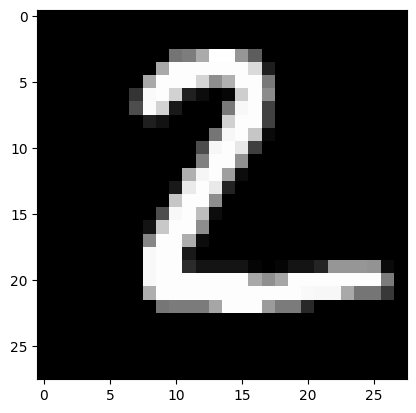

In [ ]:
print(y_pred[0], y_test[0])
plot_image(X_test[0])

1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


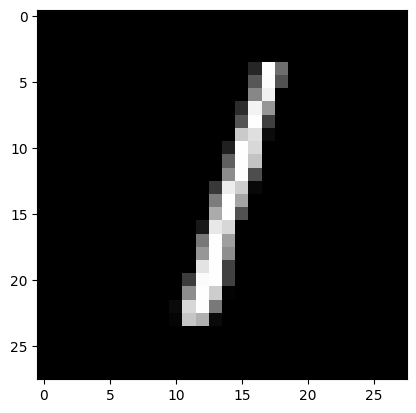

In [ ]:
print(y_pred[1], y_test[1])
plot_image(X_test[1])

Convolutional Neural Network with TensorFlow

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train / 255
X_train.shape

(60000, 28, 28, 1)

Creating the Model

In [ ]:
model = tf.keras.models.Sequential()

Adding layer

In [ ]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3)))

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Optimizer = adam

Loss = sparse_categorical_crossentropy

Metrics = accuracy

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Fitting

In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 7s 14ms/step - loss: 0.2161 - accuracy: 0.9353
Epoch 2/3
469/469 [==============================] - 6s 13ms/step - loss: 0.0561 - accuracy: 0.9827
Epoch 3/3
469/469 [==============================] - 6s 13ms/step - loss: 0.0405 - accuracy: 0.9870


Evaluating

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 7.6192 - accuracy: 0.9838


(7.619235038757324, 0.9837999939918518)

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


Ploting examples

In [ ]:
def plot_image(X_test, y_test, y_pred, index=0):
  print(f"Our prediction: {np.argmax(y_pred[index])}\n"
      f"Real label: {y_test[index]}")
  plt.imshow(X_test[index], cmap="gray")
  plt.show()

Our prediction: 7
Real label: 7


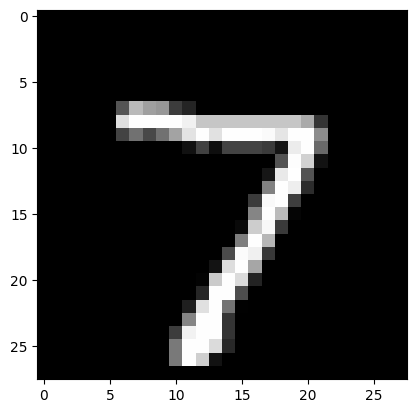

In [ ]:
plot_image(X_test, y_test, y_pred, 0)

Our prediction: 2
Real label: 2


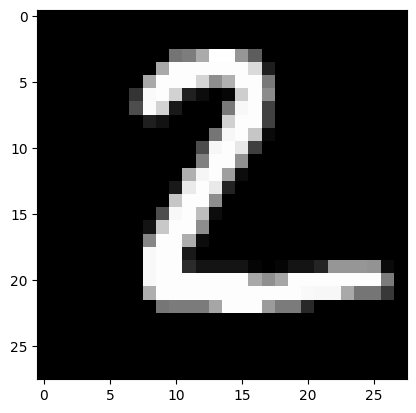

In [ ]:
plot_image(X_test, y_test, y_pred, 1)